# Real Estate Valuation - Taiwan

The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. 

## Goal of this notebook: 
The goal of this notebook is to predict the house price of unit area in Tawain (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared).

## Source data set: 
UCI Machine Learning Repository [here.](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

## Attribute Information:
The inputs are as follows:

- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.) 
- X2=the house age (unit: year) 
- X3=the distance to the nearest MRT station (unit: meter) 
- X4=the number of convenience stores in the living circle on foot (integer) 
- X5=the geographic coordinate, latitude. (unit: degree) 
- X6=the geographic coordinate, longitude. (unit: degree) 

The output is as follow:
- Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared) 

Reference [here.](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

## 1. Import Dataset



In [ ]:
#import package
import pandas as pd
import numpy as np

In [ ]:
# Ini untuk upload data dari local ke google colab di section
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Real estate valuation data set.xlsx to Real estate valuation data set.xlsx
User uploaded file "Real estate valuation data set.xlsx" with length 32717 bytes


In [ ]:
#df = pd.read_csv("/content/drive/My Drive/Digital_Skola/real_estate.csv")#colab
df = pd.read_excel('/content/Real estate valuation data set.xlsx')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
#check n row & column
df.shape

(414, 8)

This Dataset contains 414 Rows and 8 Columns

In [ ]:
#drop column no
df.drop('No', inplace= True, axis=1)

#### Profiling Stats Descriptive

In [ ]:
#An Overview of the Stats
df.describe() 

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


#### Simplify the colums label for a better manipulation

In [ ]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [ ]:
#Hapus comment pada label dan kita tetapkan variabel X
df.rename(columns={'X1 transaction date' : 'X1', 'X2 house age':'X2',
       'X3 distance to the nearest MRT station':'X3',
       'X4 number of convenience stores':'X4', 'X5 latitude':'X5', 'X6 longitude':'X6',
       'Y house price of unit area':'Y'}, inplace=True)

In [ ]:
df

,X1,X2,X3,X4,X5,X6,Y
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


## 2. EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.Y.describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: Y, dtype: float64

Dari data harga unit rumah di atas dapat diketahui bahawa rata-rata harga rumah sebesar 37.98 dengan harga terendah 7.6 dan harga tertingginya 117.5. Harga rumah rata-rata (37.98) dan nilai mediannya (38.45) tidak jauh berbeda menandakan distribusi data dari harga unit rumah ini menyebar normal.

In [ ]:
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


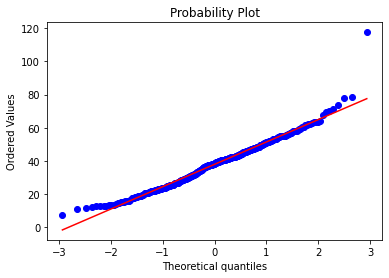

In [ ]:
stats.probplot(df['Y'], dist='norm', plot=py)
py.show()

#QQ-Plot

Dari QQ-Plot di atas dapat kita lihat bahwa titik-titik data menempel/ mendekati garis diagonal. Hal ini menunjukkan bahwa data harga unit rumah menyebar normal. Maka model ini memenuhi asumsi model regresi yaitu asumsi normalitas.

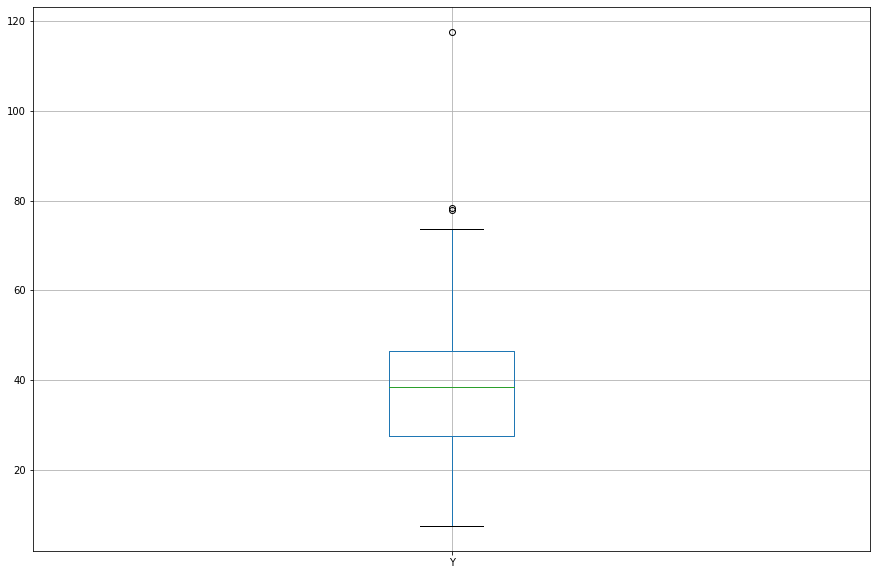

In [ ]:
df[['Y']].boxplot(figsize=(15,10))

Ada outlier, yaitu data disekitar nilai 75 ke atas (79) dan data di bawah nilai 120 (119).

In [ ]:
df.corr()

,X1,X2,X3,X4,X5,X6,Y
X1,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
X2,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


Dari analisis korelasi di atas dapat diketahui bahwa jarak stasiun MRT (-0.67), banyaknya toserba (0.57), dan letak lokasi (garis lintang dan bujur) (0.54,0.52) memperngaruhi harga unit rumah.

In [ ]:
import matplotlib.pyplot as plt

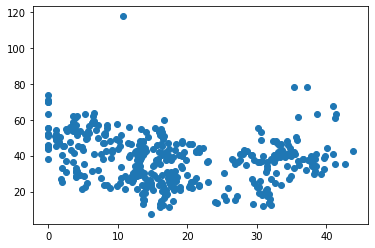

In [ ]:
#House Age vs House Price
plt.scatter(df['X2'],df['Y'])

Tidak terdapat hubungan antara lamanya usia rumah dengan harga unit rumah

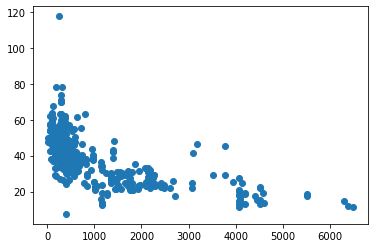

In [ ]:
#distance to the nearest MRT station vs House Price
plt.scatter(df['X3'],df['Y'])

Ada hubungan negatif antara jarak stasiun MRT ke lokasi rumah dengan harga unit rumah. Semakin jauh ke stasiun MRT, makan harga unit rumah semakin murah. Sebaliknya, semakin dekat ke stasiun MFRT, harga unit rumah semakin mahal.

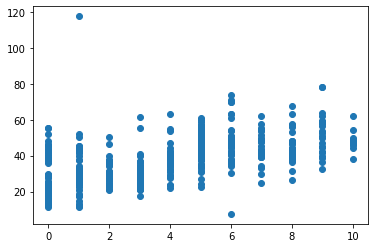

In [ ]:
#number of convenience stores vs House Price
plt.scatter(df['X4'],df['Y'])

Ada hubungan positif antara jumlah toserba di sekeliling rumah dengan tingkat harga rumah. Artinya, semakin banyak toserba di sekeliling rumah maka semakin mahal harga unit rumah tersebut. Dan sebaliknya, semakin sedikit jumlah toserba, semakin murah harga unit rumah tersebut.

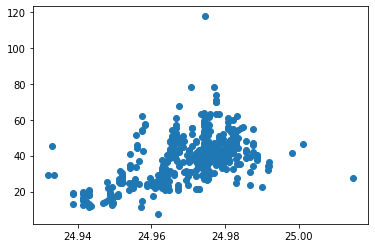

In [ ]:
#Latitude vs House Price
plt.scatter(df['X5'],df['Y'])

Ada hubungan positif antara letak latitude dengan harga unit rumah.

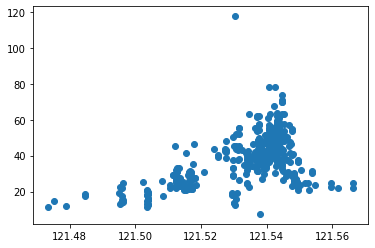

In [ ]:
#Longitude vs House Price
plt.scatter(df['X6'], df['Y'])

Ada hubungan positif antara letak longitude dan harga unit rumah.

Dapat disimpulkan variable yang berkorelasi signifikan dengan harga unit rumah:
1. X3
2. X4
3. X5
4. X6

## Feature Engineering:

###  Check jika ada Multikolinearitas

In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation Matrix antara variable X')

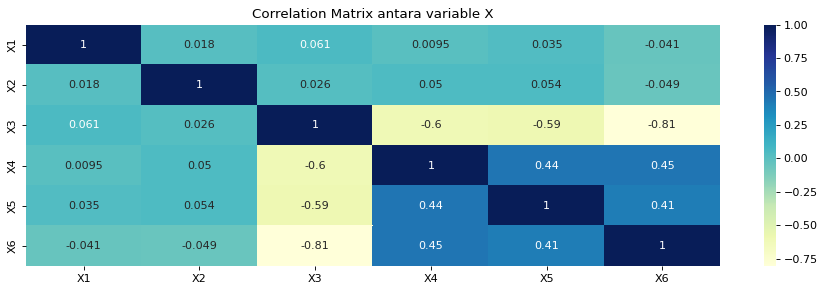

In [ ]:
fig, ax = plt.subplots(figsize=(14,4), dpi=80)
sns.heatmap(df.loc[:, 'X1':'X6'].corr(), cmap="YlGnBu",annot=True)
plt.title('Correlation Matrix antara variable X')

**Ada multikolinearitas** antara variable X6 dan X3 (-0.81). Variable X6 (longitude) tidak akan dimasukkan ke dalam model. 

(Parameter keputusan: dilihat dari koefisien korelasi kedua variable X tsb dengan variable Y, mana koefisien korelasi yang lebih tinggi, variable itulah yang akan dipertahakan)

## 3. Data Preprocessing

### Check null values

In [ ]:
df.isna().sum().sort_values(ascending=False)

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
Y     0
dtype: int64

In [ ]:
df.dtypes

X1    float64
X2    float64
X3    float64
X4      int64
X5    float64
X6    float64
Y     float64
dtype: object

X1 harusnya tipe datanya date jadi harus diubah

In [ ]:
df["X1"] = pd.to_datetime(df["X1"])

In [ ]:
df.dtypes

X1    datetime64[ns]
X2           float64
X3           float64
X4             int64
X5           float64
X6           float64
Y            float64
dtype: object

## 4. Model Prediction

In [ ]:
X = df.loc[:, 'X3':'X5']

In [ ]:
y = pd.DataFrame(df['Y'])

In [ ]:
#membagai dataset menjadi data training dan data testing dengan proporsi 80:20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X

,X3,X4,X5
0,84.87882,10,24.98298
1,306.59470,9,24.98034
2,561.98450,5,24.98746
3,561.98450,5,24.98746
4,390.56840,5,24.97937
...,...,...,...
409,4082.01500,0,24.94155
410,90.45606,9,24.97433
411,390.96960,7,24.97923
412,104.81010,5,24.96674


In [ ]:
y

,Y
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

In [ ]:
np.set_printoptions(suppress=True) 
print(X_train[:10])

[[-0.79392244  1.97363394  1.14996006]
 [-0.45911674 -0.04888257  0.77712175]
 [ 2.39952004 -1.39722692 -2.246556  ]
 [ 2.39370108 -1.39722692 -2.18100201]
 [ 0.71807047 -0.72305475  1.45642496]
 [-0.6446615  -1.06014083  0.47803167]
 [-0.47021513  0.28820351 -0.31271332]
 [ 0.05268188 -1.39722692 -1.61969598]
 [-0.49510075  0.28820351 -1.20588643]
 [ 0.93652484 -0.04888257 -0.7699524 ]]


In [ ]:
print(y_train[:10])

[[ 0.68682357]
 [ 0.18837045]
 [-1.38762101]
 [-1.68815891]
 [-1.04310194]
 [ 0.56221029]
 [ 0.17371007]
 [-1.58553621]
 [-0.35406382]
 [-0.76455461]]


### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
ypred=sc.inverse_transform(regressor.predict((X_train)))

In [ ]:
y_pred_tr = pd.DataFrame(ypred)

In [ ]:
#y_pred_ts = sc.inverse_transform(regressor.predict(sc.transform(X_test)))

In [ ]:
from sklearn.metrics import r2_score
#r2_score((y_test),y_pred_ts)

In [ ]:
from sklearn.metrics import mean_squared_error

#### MSE

In [ ]:
mse_lr = mean_squared_error(sc.y_train, ypred).round(2)

NameError: ignored

In [ ]:
# The mean squared error
print("Mean squared error: %.2f"
      % mse_lr)

#### R-Square

In [ ]:
r2_lr = r2_score(sc.inverse_transform(y_train),ypred).round(2)
r2_lr

0.51

Model regresi ini hanya mampu menjelaskan 51% keragaman datanya. 
Model regresi cukup baik jika r2 > 75%.

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

NameError: ignored

In [ ]:
ypred_rfr=sc.inverse_transform(rfr.predict((X_train)))

NameError: ignored

In [ ]:
ypred_testrf = sc.inverse_transform(rfr.predict(X_test))

NameError: ignored

#### MSE

In [ ]:
mse_rf = mean_squared_error(y_train, ypred_rfr).round(2)

In [ ]:
print("Mean squared error: %.2f"
      % mse_rf)

Mean squared error: 0.07


#### R-Square

In [ ]:
r2_rf = r2_score(sc.inverse_transform(y_train),ypred_rfr).round(2)
r2_rf

0.93

Model RF regressor ini mampu menjelaskan 93% keragaman datanya. 

### SVR

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

/Users/anwarsan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [ ]:
ypred_svr=sc.inverse_transform(svr.predict((X_train)))

#### MSE

In [ ]:
mse_svr = mean_squared_error(y_train, ypred_svr).round(2)

In [ ]:
print("Mean squared error: %.2f"
      % mse_svr)

Mean squared error: 0.37


#### R-Square

In [ ]:
r2_svr = r2_score(sc.inverse_transform(y_train),ypred_svr).round(2)
r2_svr

0.63

Model Support Vector Regression ini hanya mampu menjelaskan 65% keragaman datanya. 

### Model Comparison

In [ ]:
data = np.array([['','R-square', 'MSE'],
                 ['Linear Regression', r2_lr, mse_lr],
                 ['Random Forest Regressor', r2_rf, mse_rf],
                 ['SVR', r2_svr, mse_svr]])

In [ ]:
data

array([['', 'R-square', 'MSE'],
       ['Linear Regression', '0.51', '0.49'],
       ['Random Forest Regressor', '0.93', '0.07'],
       ['SVR', '0.63', '0.37']], dtype='<U23')

In [ ]:
table = pd.DataFrame(data = data[1:,1:],
                    index = data [1:,0],
                    columns = data[0,1:])

**Table comparison of model prediction**

In [ ]:
table.sort_values(by='R-square', ascending=False)

,R-square,MSE
Random Forest Regressor,0.93,0.07
SVR,0.63,0.37
Linear Regression,0.51,0.49


**Kesimpulan:** Dari ketiga model, model ***RF Regressor*** merupakan model terbaik untuk memprediksi harga unit rumah karena jika dilihat dari performance model yaitu R2 RF regressor sebesar 93% merupakan nilai yang tertinggi dan MSE-nya 7%  adalah yang terendah. Artinya model mampu menjelaskan keragaman data sebanyak 93% dan memiliki tingkat kesalahan prediksi sebesar 7%. 

**Note: Good Model (Regression) jika R2 >= 75% dan MSE <= 10%**

_________________________________________________________________________________________

**END OF CODE**